In [1]:
import numpy as np
import dask.array as da

from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 20,Total memory: 7.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42115,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:41325,Total threads: 4
Dashboard: http://127.0.0.1:46479/status,Memory: 1.51 GiB
Nanny: tcp://127.0.0.1:36985,


### 2. Dask Array 생성: numpy와 비슷하지만 'chunks'가 핵심
numpy 배열을 만들 때 shape을 지정했다면, dask.array는 shape과 함께 **chunks**를 지정해야 합니다.

- chunks란? dask.dataframe의 '파티션'과 동일한 개념입니다. 전체 배열을 잘게 쪼갠 numpy 배열 조각을 의미합니다.

예를 들어, (10000, 10000) 크기의 float64 배열을 numpy로 만들면 약 745MB의 RAM이 필요합니다. (200000, 200000) (약 298GB)처럼 메모리보다 큰 배열을 만들어 보겠습니다.

In [2]:
# (200000, 200000) 크기의 '계획' 생성
# 이 배열을 (10000, 10000) 크기의 '청크'로 쪼갠다.
# (총 20x20 = 400개의 청크가 생성됨)
shape = (30_000, 30_000)
chunks = (10_000, 10_000)

# da.random.random()은 numpy와 동일하게 작동
# (실제 메모리 할당 안 함. 0.1초 미만 소요)
dask_arr = da.random.random(shape, chunks=chunks)

print(dask_arr)

dask.array<random_sample, shape=(30000, 30000), dtype=float64, chunksize=(10000, 10000), chunktype=numpy.ndarray>


### 3. 연산: 지연 평가(lazy)와 .compute()

계획 객체: dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


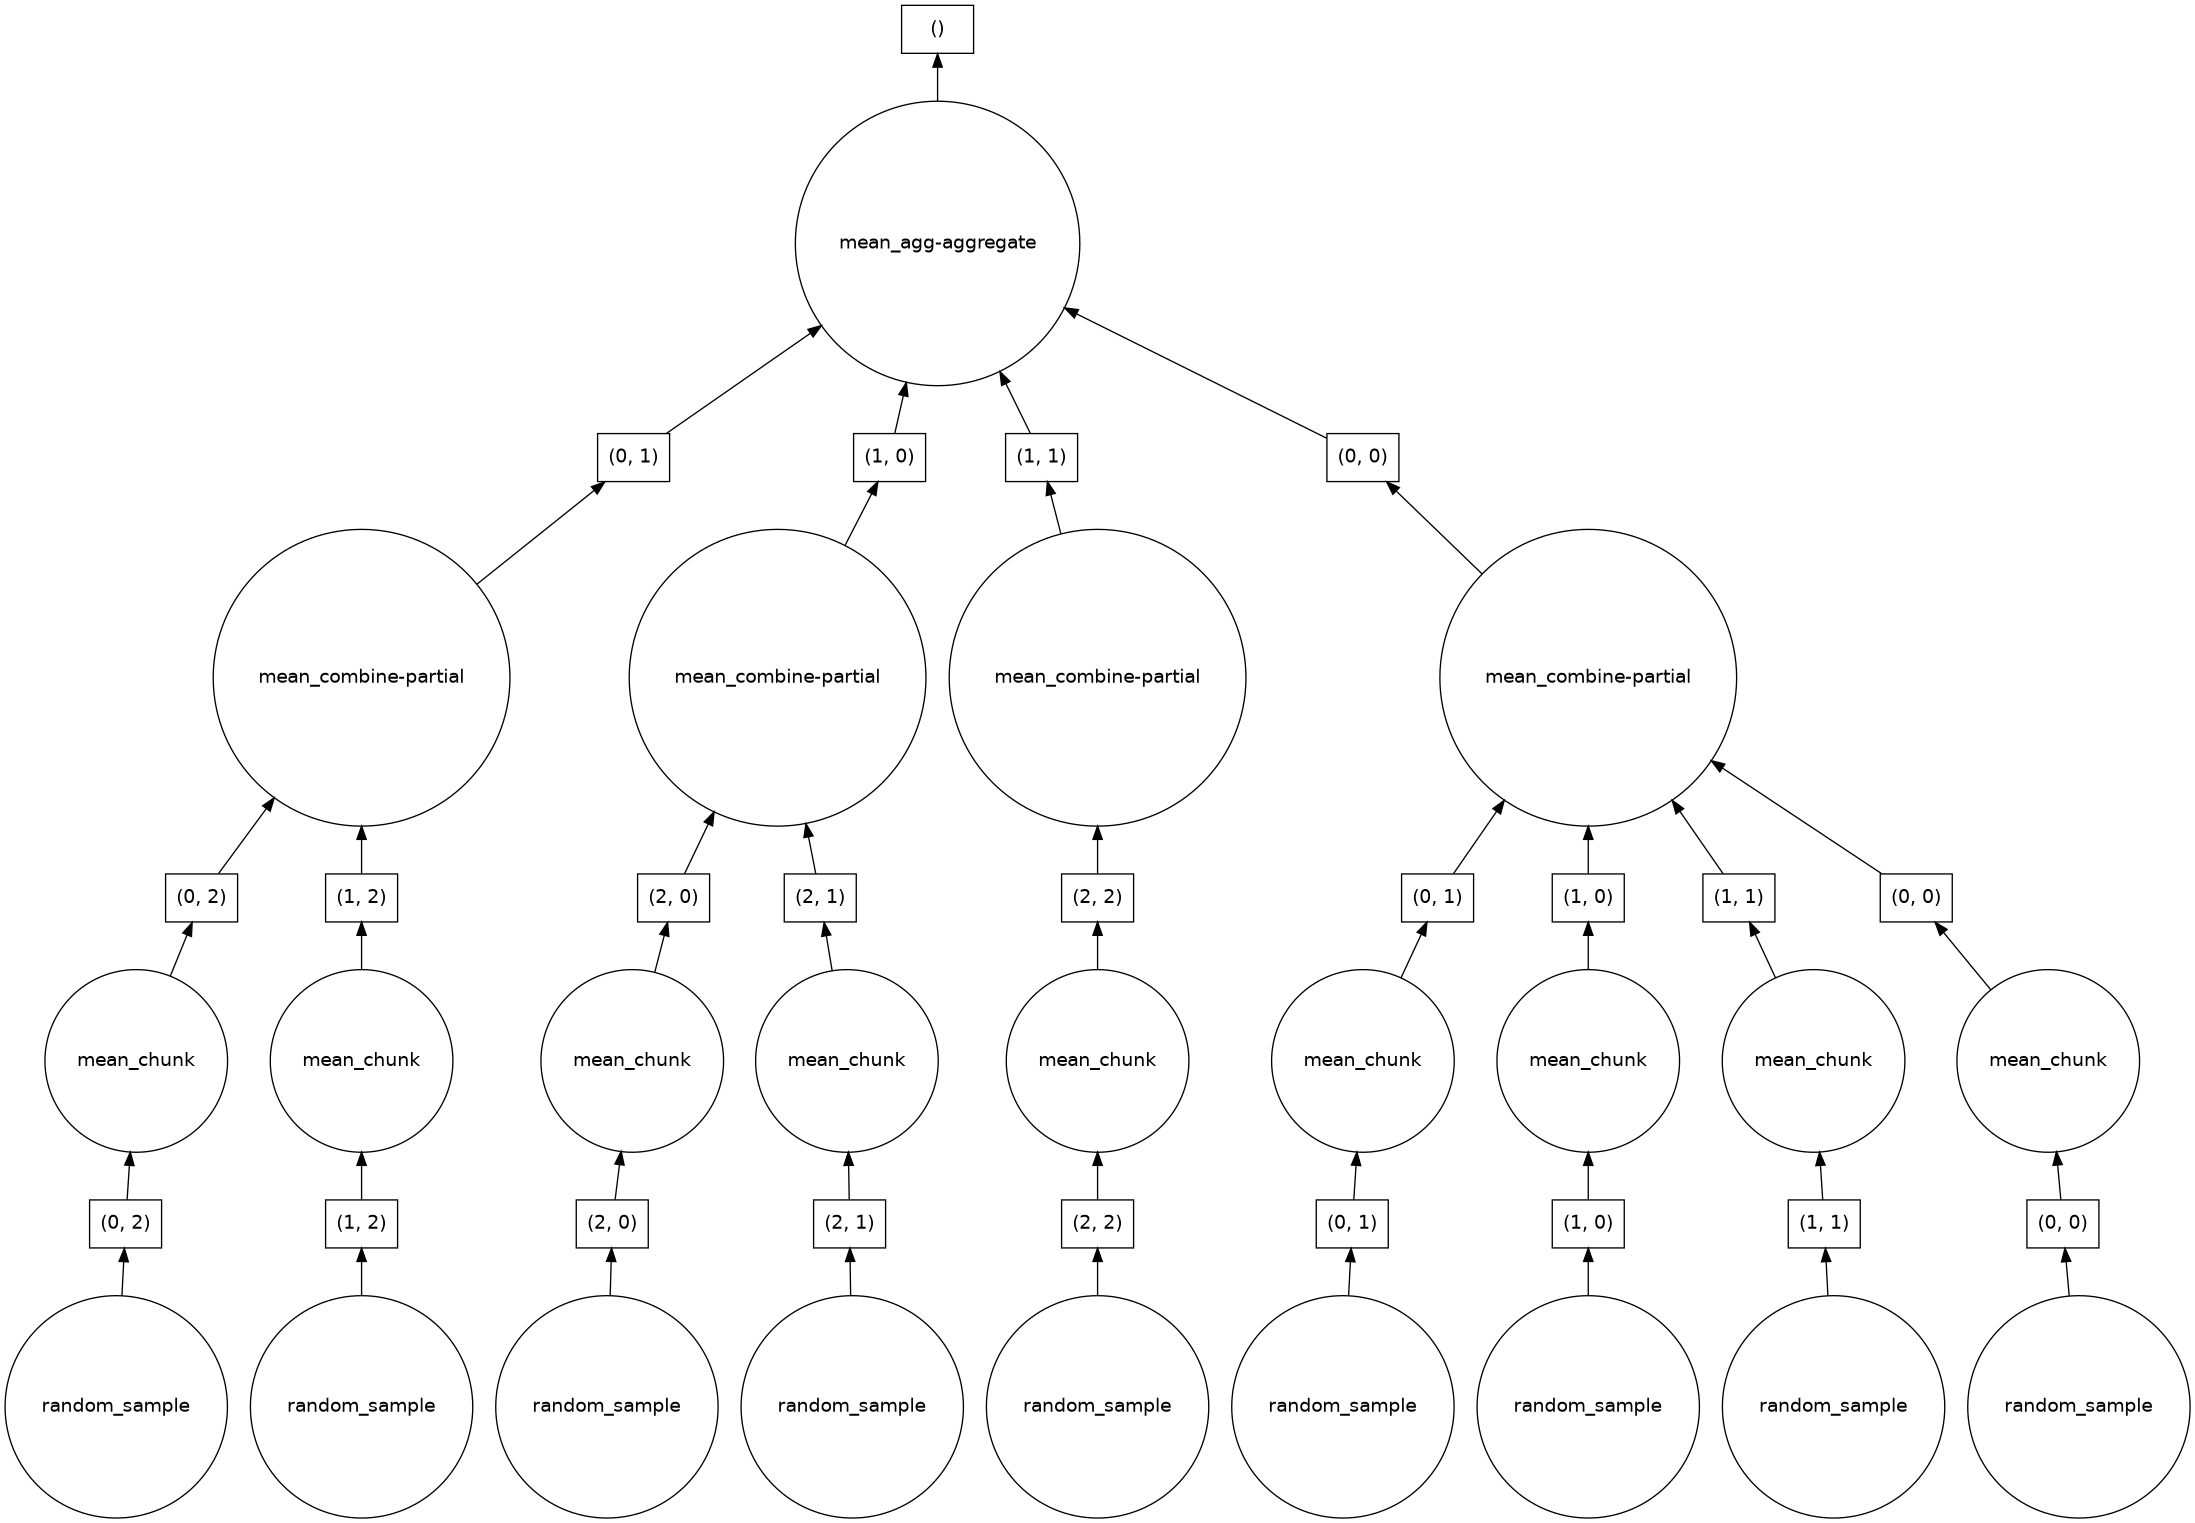

In [3]:
# 1. 298GB짜리 배열의 '평균'을 구하는 '계획'
mean_plan = dask_arr.mean()

print(f"계획 객체: {mean_plan}")

# 2. .visualize()로 태스크 그래프 확인
mean_plan.visualize()

In [ ]:
%%time
# 3. .compute()로 실제 연산 실행
# ❗️ 대시보드 관찰:
# 400개의 'random' 작업이 병렬로 실행되고,
# 워커 메모리가 (1만,1만) 청크 크기만큼만 올랐다가 비워지는 것을 반복합니다.
# (298GB가 한 번에 올라가지 않음!)
mean_val = mean_plan.compute()

print(f"\n298GB 배열의 평균값: {mean_val}")